# Probablistic Inference with pyAgrum

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

In this notebook, we will show different basic features for probabilistic inference on Bayesian networks using pyAgrum.

First we need some external modules:

In [1]:
import os 

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

## Basic inference and display

Then we import pyAgrum and the pyAgrum's notebook module, that offers very usefull methods when writting a notebook.

This first example shows how you can load a BayesNet and show it as graph. Note that pyAgrum handles serveral BayesNet file format such as DSL, BIF and UAI.

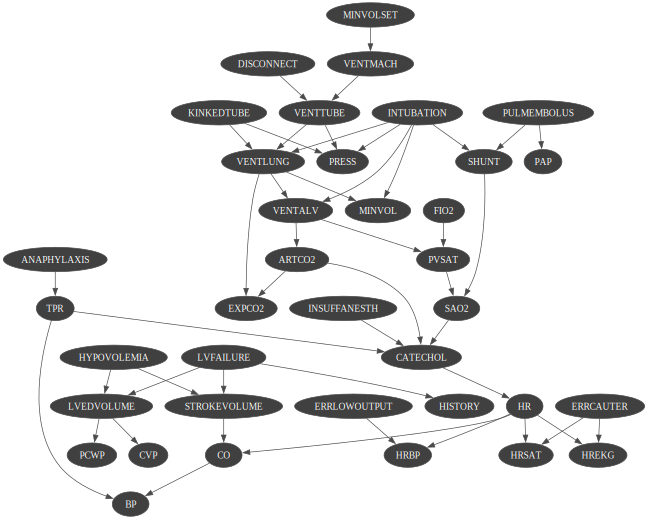

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
bn=gum.loadBN("res/alarm.dsl")
gnb.showBN(bn,size="9")

In [3]:
print(bn)

BN{nodes: 37, arcs: 46, domainSize: 10^16.2389, dim: 509, mem: 5Ko 896o}


From there, it is easy to get a posterior using an inference engine :

In [4]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
print(ie.posterior(bn.idFromName("CATECHOL")))


  CATECHOL         |
NORMAL   |HIGH     |
---------|---------|
 0.0512  | 0.9488  |



But since we are in notebook, why not use pyAgrum notebook's methods ?

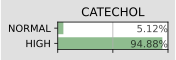

In [5]:
gnb.showPosterior(bn,evs={},target='CATECHOL')

You may also want to see the graph with some posteriors

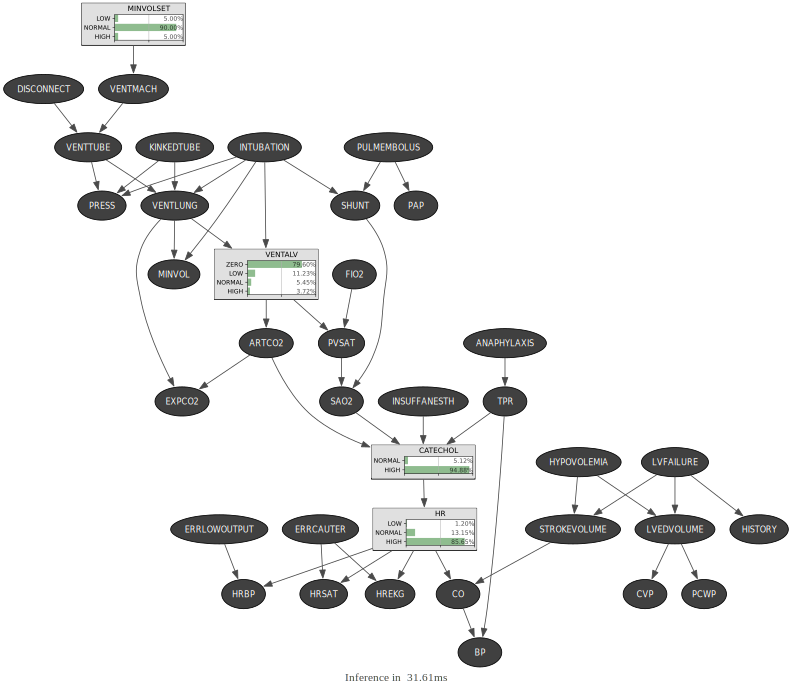

In [6]:
# due to matplotlib, format is forced to png.
gnb.showInference(bn,evs={},targets={"VENTALV","CATECHOL","HR","MINVOLSET"},size="11")

.. and then observe the impact of evidence :

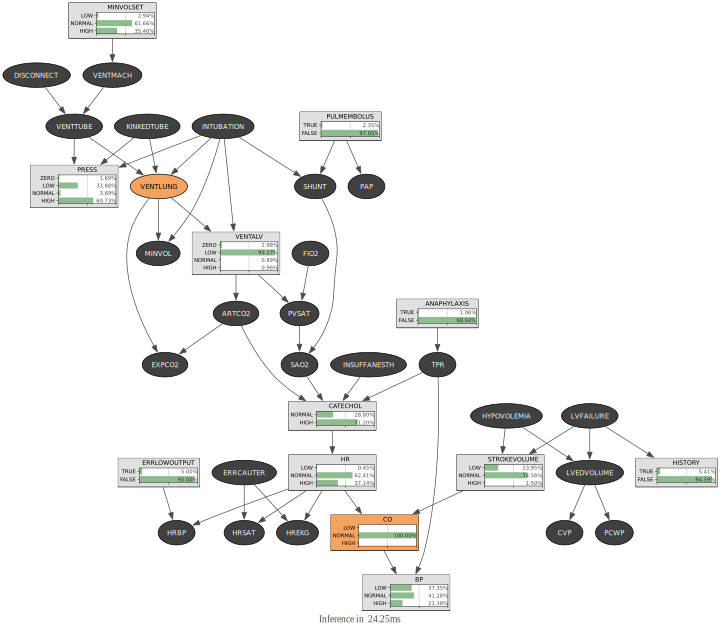

In [7]:
gnb.showInference(bn,
                  evs={"CO":1,"VENTLUNG":1},
                  targets={"VENTALV",
                           "CATECHOL",
                           "HR",
                           "MINVOLSET",
                           "ANAPHYLAXIS",
                           "STROKEVOLUME",
                           "ERRLOWOUTPUT",
                           "HBR",
                           "PULMEMBOLUS",
                           "HISTORY",
                           "BP",
                           "PRESS",
                           "CO"},
                  size="10")

You can even compute all posteriors by leaving the `targets` parameter empty (which is its default value).

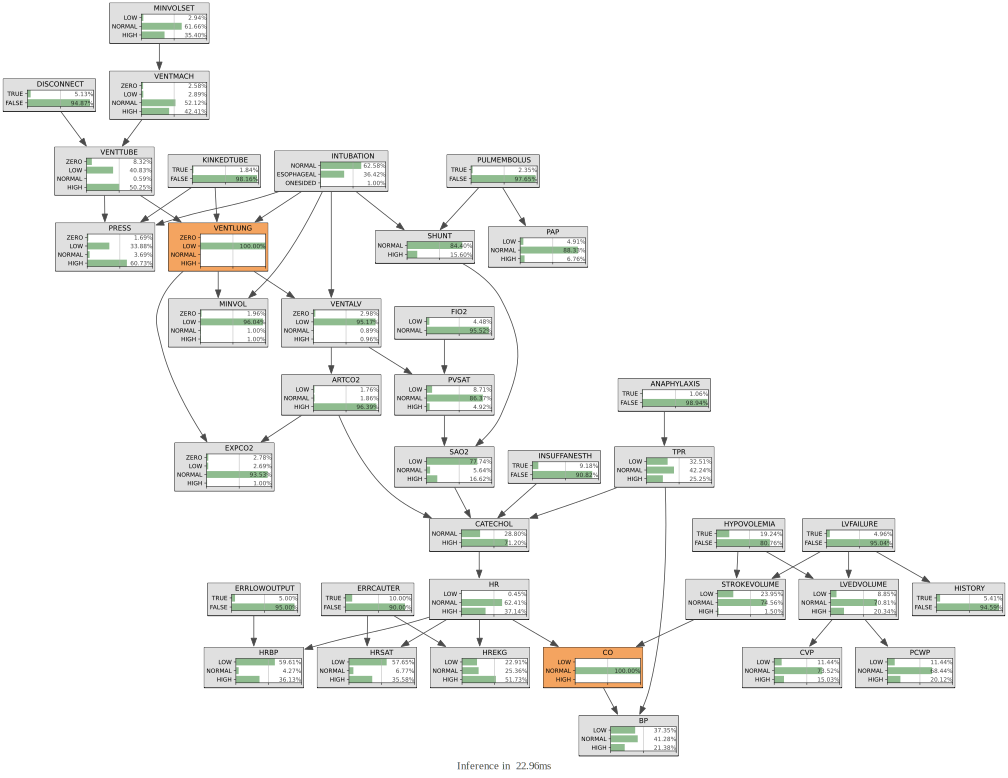

In [8]:
gnb.showInference(bn,evs={"CO":1,"VENTLUNG":1},size="14")

## Showing the information graph

To have a <em>global</em> view of the knowledge brought by the inference, you can also draw the entropy of all nodes

In [9]:
import pyAgrum.lib.explain as explain
explain.showInformation(bn,{},size="14")

... and then observe the impact of an evidence on the whole bayes network :

In [10]:
explain.showInformation(bn,{"CO":0},size="9")

## Exploring the junction tree

Lazy Propagation, like several other inference algorithms, uses a junction tree to propagate information.

You can show the junction tree used by Lazy Propagation with pyAgrum:

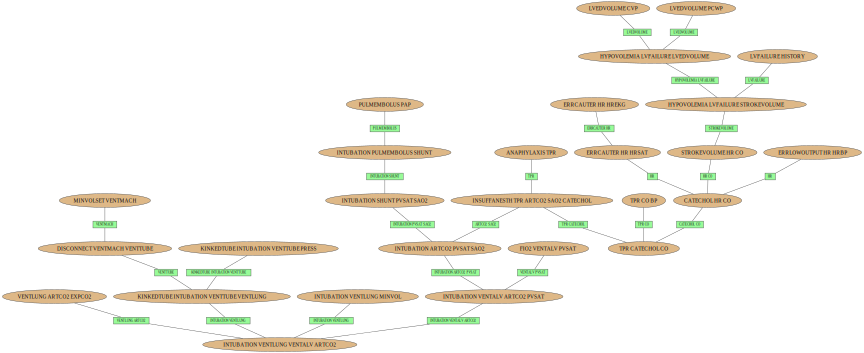

In [11]:
jt=ie.junctionTree()
gnb.showJunctionTree(bn,size="12")

In [12]:
# another representation of the junction, more convenient for investigating the flow of data in the jt
# the size/width of cliques and separators are proportionnal to the number of nodes in the factor.
jt.map()

### Introspection in junction trees

One can easily walk through the junction tree.

In [13]:
for n in jt.nodes():
    print([bn.variable(n).name() for n in jt.clique(n)])

['CVP', 'LVEDVOLUME']
['FIO2', 'VENTALV', 'PVSAT']
['ARTCO2', 'EXPCO2', 'VENTLUNG']
['VENTMACH', 'MINVOLSET']
['VENTMACH', 'DISCONNECT', 'VENTTUBE']
['PRESS', 'KINKEDTUBE', 'INTUBATION', 'VENTTUBE']
['ANAPHYLAXIS', 'TPR']
['HRBP', 'ERRLOWOUTPUT', 'HR']
['LVFAILURE', 'HISTORY']
['HREKG', 'HR', 'ERRCAUTER']
['PCWP', 'LVEDVOLUME']
['PAP', 'PULMEMBOLUS']
['SHUNT', 'INTUBATION', 'PULMEMBOLUS']
['HRSAT', 'HR', 'ERRCAUTER']
['LVFAILURE', 'HYPOVOLEMIA', 'LVEDVOLUME']
['HYPOVOLEMIA', 'STROKEVOLUME', 'LVFAILURE']
['CO', 'BP', 'TPR']
['INTUBATION', 'VENTLUNG', 'MINVOL']
['KINKEDTUBE', 'INTUBATION', 'VENTTUBE', 'VENTLUNG']
['INSUFFANESTH', 'TPR', 'ARTCO2', 'SAO2', 'CATECHOL']
['CO', 'STROKEVOLUME', 'HR']
['CO', 'CATECHOL', 'HR']
['CO', 'TPR', 'CATECHOL']
['INTUBATION', 'SHUNT', 'PVSAT', 'SAO2']
['INTUBATION', 'ARTCO2', 'PVSAT', 'SAO2']
['ARTCO2', 'VENTALV', 'INTUBATION', 'PVSAT']
['VENTALV', 'INTUBATION', 'ARTCO2', 'VENTLUNG']


In [14]:
for e in jt.edges():
    print(f"Separator for {e} : {jt.clique(e[0]).intersection(jt.clique(e[1]))}")

Separator for (13, 30) : {18, 2}
Separator for (2, 33) : {26, 22}
Separator for (3, 4) : {16}
Separator for (26, 27) : {34, 30}
Separator for (7, 26) : {31}
Separator for (12, 13) : {4}
Separator for (31, 32) : {27, 26, 2}
Separator for (23, 31) : {26, 28}
Separator for (5, 22) : {0, 2, 20}
Separator for (17, 24) : {13}
Separator for (19, 27) : {34, 14}
Separator for (24, 26) : {34, 31}
Separator for (32, 33) : {25, 2, 26}
Separator for (6, 23) : {14}
Separator for (23, 27) : {14, 30}
Separator for (11, 16) : {15}
Separator for (10, 14) : {7, 31}
Separator for (8, 17) : {9}
Separator for (0, 16) : {15}
Separator for (1, 32) : {25, 27}
Separator for (20, 33) : {2, 22}
Separator for (4, 22) : {20}
Separator for (14, 26) : {31}
Separator for (22, 33) : {2, 22}
Separator for (30, 31) : {2, 27, 28}
Separator for (16, 17) : {1, 9}


In [15]:
jt.hasRunningIntersection()

True

## Introspecting junction trees and friends

The junction tree created by a LazyPropagation is optimized for the query (see `RelevanceReasonning` notebook). But you can also introspect a junction tree directly from a BN or a graph using the `JunctionTreeGenerator`'s class.

In [16]:
bn=gum.fastBN("0->1->2<-3->4->5->6<-2->7")
jtg=gum.JunctionTreeGenerator()
gnb.sideBySide(bn,jtg.junctionTree(bn),jtg.eliminationOrder(bn),jtg.binaryJoinTree(bn),
              captions=["A Bayesien network",
                        "a junction tree for this BN",
                        "its elimination order",
                        "an (optimized) binary join tree"])

"[6, 7, 0, 1, 2, 3, 4, 5]its elimination order"


### junction tree from graphs (using uniform domainSize)

In [17]:
#creating a dag slightly different
dag=bn.dag()
dag.addArc(0,3)
dag.addArc(0,7)
gnb.sideBySide(dag,dag.moralGraph(),jtg.junctionTree(dag),jtg.eliminationOrder(dag),jtg.binaryJoinTree(dag),
              captions=["A DAG","its moral graph",
                        "a junction tree for this dag (with partial order)",
                        "its elimination order (with partial order)",
                        "an (optipmized) binary jointree (with partial order)"])

"[6, 1, 7, 0, 2, 3, 4, 5]its elimination order (with partial order)"


In [18]:
#creating an undigraph slightly different
ug=bn.dag().moralGraph()
ug.addEdge(0,7)
gnb.sideBySide(ug,jtg.junctionTree(ug),jtg.eliminationOrder(ug),jtg.binaryJoinTree(ug),
              captions=["A undigraph",
                        "a junction tree for this undigraph",
                        "its elimination order",
                        "an (optipmized) binary jointree"])

"[6, 4, 5, 3, 2, 1, 7, 0]its elimination order"


### Using partial order to specify  the elimination order

In [19]:
#adding a partial order for the elimination order
po=[[1,2,3],[0,4,7],[5,6]]
gnb.sideBySide(bn,jtg.junctionTree(bn,po),jtg.eliminationOrder(bn,po),jtg.binaryJoinTree(bn),
              captions=["A Bayesien network",
                        "a junction tree for this BN using partial order",
                        "its elimination order following partial order",
                        "an (optimized) binary join tree"])

G <!-- (0) 1-2-3-4 --> (0) 1-2-3-4 1-2-3-4 <!-- (0) 1-2-3-4^(1) 0-1-2-4 --> (0) 1-2-3-4^(1) 0-1-2-4 1-2-4 <!-- (0) 1-2-3-4--(0) 1-2-3-4^(1) 0-1-2-4 --> (0) 1-2-3-4--(0) 1-2-3-4^(1) 0-1-2-4 <!-- (1) 0-1-2-4 --> (1) 0-1-2-4 0-1-2-4 <!-- (1) 0-1-2-4^(2) 0-2-4-5-6-7 --> (1) 0-1-2-4^(2) 0-2-4-5-6-7 0-2-4 <!-- (1) 0-1-2-4--(1) 0-1-2-4^(2) 0-2-4-5-6-7 --> (1) 0-1-2-4--(1) 0-1-2-4^(2) 0-2-4-5-6-7 <!-- (2) 0-2-4-5-6-7 --> (2) 0-2-4-5-6-7 0-2-4-5-6-7 <!-- (0) 1-2-3-4^(1) 0-1-2-4--(1) 0-1-2-4 --> (0) 1-2-3-4^(1) 0-1-2-4--(1) 0-1-2-4 <!-- (1) 0-1-2-4^(2) 0-2-4-5-6-7--(2) 0-2-4-5-6-7 --> (1) 0-1-2-4^(2) 0-2-4-5-6-7--(2) 0-2-4-5-6-7 a junction tree for this BN using partial order,"[3, 1, 2, 7, 0, 4, 6, 5]its elimination order following partial order"


In [20]:
#adding a partial order for the elimination order also for the graphs
po=[[0,4,7],[1,3],[5,6,2]]

#creating a dag slightly different
dag=bn.dag()
dag.addArc(0,3)
dag.addArc(0,7)

gnb.sideBySide(dag,dag.moralGraph(),jtg.junctionTree(dag,po),jtg.eliminationOrder(dag,po),jtg.binaryJoinTree(dag,po),
              captions=["A DAG","its moral graph",
                        "a junction tree for this dag (with partial order)",
                        "its elimination order (with partial order)",
                        "an (optipmized) binary jointree (with partial order)"])

"[7, 0, 4, 1, 3, 2, 6, 5]its elimination order (with partial order)"
